In [18]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import optuna

In [19]:
# 1. Carregar e Visualizar os Dados
dados = pd.read_csv('./datasets/dados_de_irrigacao.csv') 
print("Visualização das primeiras linhas:")
print(dados.head())

Visualização das primeiras linhas:
   Horas de Irrigação  Área Irrigada  Área Irrigada por Ângulo
0                   1            100                 66.666667
1                   2            200                133.333333
2                   3            300                200.000000
3                   4            400                266.666667
4                   5            500                333.333333


In [20]:
# 2. Análise Exploratória dos Dados (EDA)
print("\nEstatísticas descritivas:")
dados.describe()


Estatísticas descritivas:


,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


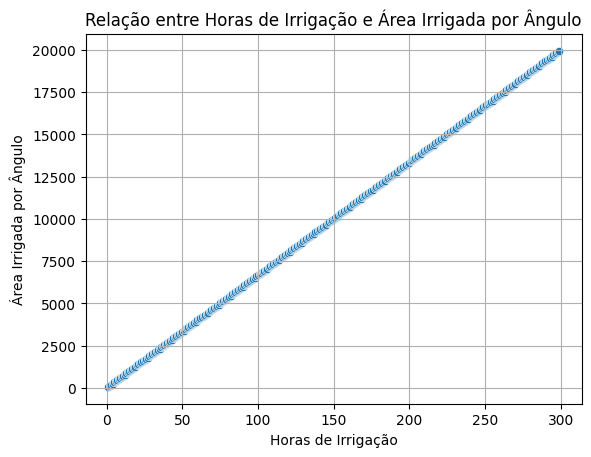

In [21]:
# Gráfico de dispersão usando seaborn
sns.scatterplot(data=dados, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Relação entre Horas de Irrigação e Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()

In [22]:
# Gráfico de dispersão interativo com plotly
fig = px.scatter(dados, x='Horas de Irrigação', y='Área Irrigada por Ângulo', title='Dispersão Interativa')
fig.show()

In [23]:
# Correlação
correlacao = dados.corr(numeric_only=True)
print("\nMatriz de correlação:")
print(correlacao)


Matriz de correlação:
                          Horas de Irrigação  Área Irrigada  \
Horas de Irrigação                       1.0            1.0   
Área Irrigada                            1.0            1.0   
Área Irrigada por Ângulo                 1.0            1.0   

                          Área Irrigada por Ângulo  
Horas de Irrigação                             1.0  
Área Irrigada                                  1.0  
Área Irrigada por Ângulo                       1.0  


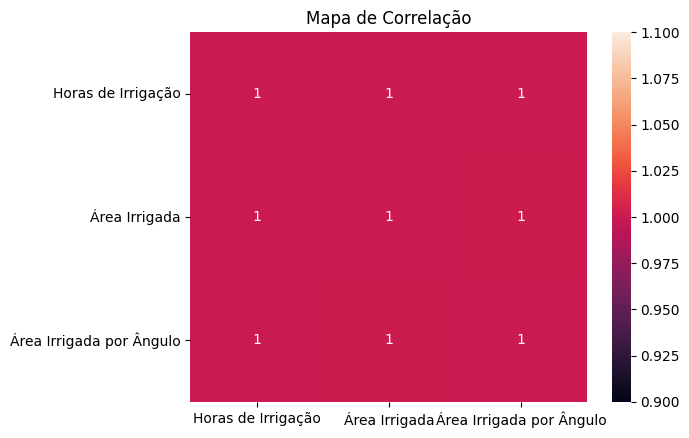

In [24]:
sns.heatmap(correlacao, annot=True)
plt.title('Mapa de Correlação')
plt.show()

In [25]:
# 3. Construção do Modelo de Regressão Linear
X = dados[['Horas de Irrigação']]
y = dados['Área Irrigada por Ângulo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
# Imprimir a equação da reta
coef = modelo.coef_[0]
intercepto = modelo.intercept_
print(f"\nEquação da reta: Y = {coef:.2f} * X + {intercepto:.2f}")


Equação da reta: Y = 66.67 * X + 0.00


In [27]:
# 4. Avaliação do Modelo
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 0.00
MAE: 0.00


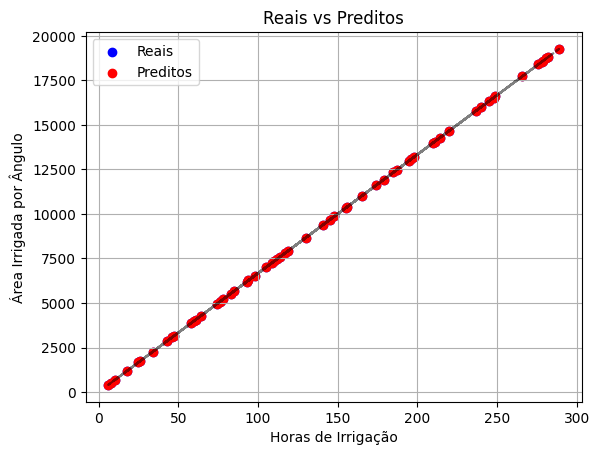

In [28]:
# Visualizar resultados reais vs preditos
plt.scatter(X_test, y_test, color='blue', label='Reais')
plt.scatter(X_test, y_pred, color='red', label='Preditos')
plt.plot(X_test, y_pred, color='black', linestyle='--', alpha=0.5)
plt.title('Reais vs Preditos')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.legend()
plt.grid(True)
plt.show()

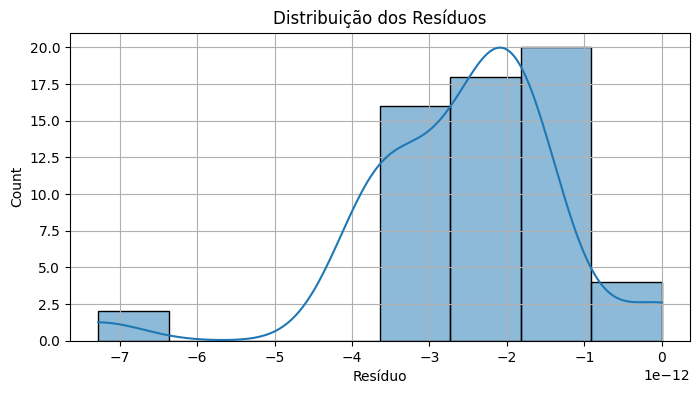

In [29]:
# 5. Análise de Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.grid(True)
plt.show()

In [30]:
# Teste de normalidade (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuos)
print(f"\nTeste de Shapiro-Wilk: Estatística={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos NÃO seguem uma distribuição normal.")


Teste de Shapiro-Wilk: Estatística=0.8258, p-valor=0.0000
Os resíduos NÃO seguem uma distribuição normal.


In [31]:
# 6. Predição de Exemplo
horas_exemplo = np.array([[15]])
pred_exemplo = modelo.predict(horas_exemplo)[0]
print(f"\nPara 15 horas de irrigação, a área irrigada por ângulo prevista é: {pred_exemplo:.2f}")


Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.00


c:\Users\ghost\.virtualenvs\ai_challenge_linear_regression-qoOnlQVI\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

